In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

matrix1 = tf.constant([[1, 2], [3, 4]])
matrix2 = tf.constant([[1, 0], [1, 1]])

product = tf.matmul(matrix1, matrix2)
print(product)

tf.Tensor(
[[3 2]
 [7 4]], shape=(2, 2), dtype=int32)


In [3]:
X_train = np.loadtxt('train_X.csv', delimiter=',')
Y_train = np.loadtxt('train_label.csv', delimiter=',')

X_test = np.loadtxt('test_X.csv', delimiter=',')
Y_test = np.loadtxt('test_label.csv', delimiter=',')

In [4]:
print("shape of X train: ", X_train.shape)
print("shape of Y train: ", Y_train.shape)
print("shape of X test: ", X_test.shape)
print("shape of Y test: ", Y_test.shape)

shape of X train:  (1000, 784)
shape of Y train:  (1000, 10)
shape of X test:  (350, 784)
shape of Y test:  (350, 10)


#Training the Model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(64, activation='tanh'),
  tf.keras.layers.Dense(32, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15) # Adjust epochs as needed

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4063 - loss: 1.7953
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7423 - loss: 0.9703
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8273 - loss: 0.7056
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8473 - loss: 0.6039
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8902 - loss: 0.4776
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8573 - loss: 0.4968
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8997 - loss: 0.3919
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9101 - loss: 0.3574
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8952 - loss: 0.3705
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9024 - loss: 0.3433
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8883 - loss: 0.3646
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8872 - loss: 0.3303


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 733,568 (2.80 MB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 489,046 (1.87 MB)

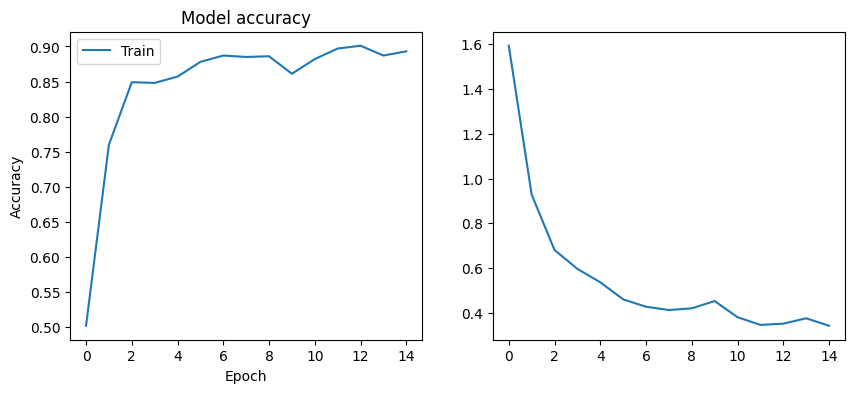

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])

#Evaluating Model Result

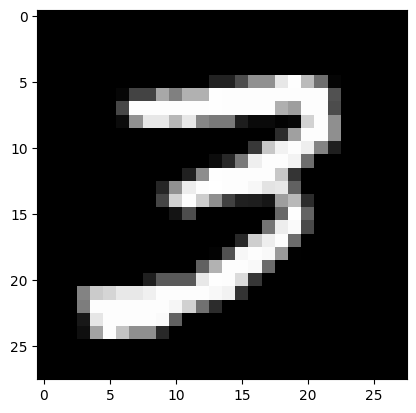

In [ ]:
import random

random_index = random.randint(0, X_train.shape[0] - 1)
plt.imshow(X_train[random_index].reshape(28, 28), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


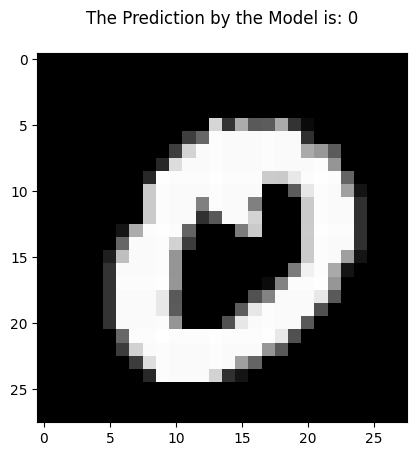

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

random_index = random.randint(0, X_train.shape[0] - 1)
image = X_train[random_index]

# Reshaping the image
image_reshaped = image.reshape(28, 28)

# Make a prediction using the model
prediction = model.predict(image.reshape(1, -1))

# Get the predicted class label
predicted_label = np.argmax(prediction)

plt.imshow(image_reshaped, cmap='gray')
plt.title(f"The Prediction by the Model is: {predicted_label}\n")
plt.show()